In [3]:
#pip3 install opencv-python  for reading images

In [24]:
import numpy as np
import glob
import pandas as pd
import matplotlib.pylab as plt
import cv2  #cv2.imread for reading images
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPool2D

In [7]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
dir_flower=keras.utils.get_file(origin=dataset_url,cache_dir='.',untar=True)

228813984/228813984 [==============================] - 36s 0us/step


In [117]:
flowers_dic={
    "roses": glob.glob("datasets/flower_photos/roses/*.jpg"),
    "daisy": glob.glob("datasets/flower_photos/daisy/*.jpg"),
    "dandelion": glob.glob("datasets/flower_photos/dandelion/*.jpg"),
    "sunflowers": glob.glob("datasets/flower_photos/sunflowers/*.jpg"),
    "tulips": glob.glob("datasets/flower_photos/tulips/*.jpg")    
}

In [118]:
flower_classes={
                "roses": 0,
                "daisy" :1,
                "dandelion":2,
                "sunflowers":3,
                 "tulips":4}

In [95]:
X=[]
Y=[]
for flower_name,images in flowers_dic.items():
    for image in images:
        img=cv2.imread(image)
        X.append(cv2.resize(img,(180,180)))
        Y.append(flower_classes[flower_name])            

In [96]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y, test_size=0.25,random_state=100)

In [97]:
xtrain=np.array(xtrain)/255
xtest=np.array(xtest)/255
ytrain=np.array(ytrain)
ytest=np.array(ytest)

In [10]:
model=keras.Sequential([
    keras.layers.Conv2D(filters=16,kernel_size=(3,3),input_shape=(180,180,3),activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'),
    keras.layers.MaxPool2D(3),
    keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'),
    keras.layers.MaxPool2D(3),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(5,activation='softmax')    
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

model.fit(xtrain, ytrain, epochs=30)

Epoch 1/30
86/86 [==============================] - 28s 309ms/step - loss: 1.2754 - accuracy: 0.4455
Epoch 2/30
86/86 [==============================] - 26s 304ms/step - loss: 1.0373 - accuracy: 0.5861
Epoch 3/30
86/86 [==============================] - 26s 305ms/step - loss: 0.9124 - accuracy: 0.6443
Epoch 4/30
86/86 [==============================] - 26s 308ms/step - loss: 0.8210 - accuracy: 0.6744
Epoch 5/30
86/86 [==============================] - 27s 314ms/step - loss: 0.7081 - accuracy: 0.7347
Epoch 6/30
86/86 [==============================] - 26s 304ms/step - loss: 0.6175 - accuracy: 0.7613
Epoch 7/30
86/86 [==============================] - 26s 305ms/step - loss: 0.5234 - accuracy: 0.8031
Epoch 8/30
86/86 [==============================] - 27s 312ms/step - loss: 0.4345 - accuracy: 0.8350
Epoch 9/30
86/86 [==============================] - 28s 324ms/step - loss: 0.3046 - accuracy: 0.8953
Epoch 10/30
86/86 [==============================] - 25s 293ms/step - loss: 0.2196 - accura

In [183]:
model.evaluate(xtest,ytest)

29/29 [==============================] - 2s 60ms/step - loss: 1.9648 - accuracy: 0.6776


[1.9648053646087646, 0.6775599122047424]

In [213]:
#CNN using agumentation (RandomFlip,RandomRotation,RandomZoom)

In [18]:
data_agumentation=keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1),
    
])

In [207]:
#plt.imshow(data_agumentation(xtrain[1000]))

In [19]:
model=keras.Sequential([
    data_agumentation,
    keras.layers.Conv2D(filters=16,kernel_size=(3,3),input_shape=(180,180,3),activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'),
    keras.layers.MaxPool2D(3),
    keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'),
    keras.layers.MaxPool2D(3),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(5,activation='softmax')    
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

model.fit(xtrain, ytrain, epochs=30)

Epoch 1/30
86/86 [==============================] - 38s 417ms/step - loss: 1.3083 - accuracy: 0.4346
Epoch 2/30
86/86 [==============================] - 33s 390ms/step - loss: 1.0503 - accuracy: 0.5781
Epoch 3/30
86/86 [==============================] - 29s 338ms/step - loss: 0.9069 - accuracy: 0.6417
Epoch 4/30
86/86 [==============================] - 31s 363ms/step - loss: 0.8354 - accuracy: 0.6737
Epoch 5/30
86/86 [==============================] - 30s 344ms/step - loss: 0.8139 - accuracy: 0.6915
Epoch 6/30
86/86 [==============================] - 30s 352ms/step - loss: 0.7787 - accuracy: 0.7111
Epoch 7/30
86/86 [==============================] - 29s 332ms/step - loss: 0.7263 - accuracy: 0.7162
Epoch 8/30
86/86 [==============================] - 29s 333ms/step - loss: 0.7046 - accuracy: 0.7195
Epoch 9/30
86/86 [==============================] - 28s 330ms/step - loss: 0.6759 - accuracy: 0.7438
Epoch 10/30
86/86 [==============================] - 28s 327ms/step - loss: 0.6582 - accura

In [21]:
model.evaluate(xtest,ytest)

29/29 [==============================] - 3s 65ms/step - loss: 0.8066 - accuracy: 0.7560


[0.8066354990005493, 0.7559912800788879]

In [131]:
#image classification using Transfer Learning
#download pre-trained model from hub for fishes

In [34]:
#!pip install tensorflow_hub

In [35]:
clf = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4",input_shape=(224, 224,3))
])

In [132]:
fish_labels=[]
with open ("Image_fish_label.txt") as f:
    fish_labels=f.read().splitlines()

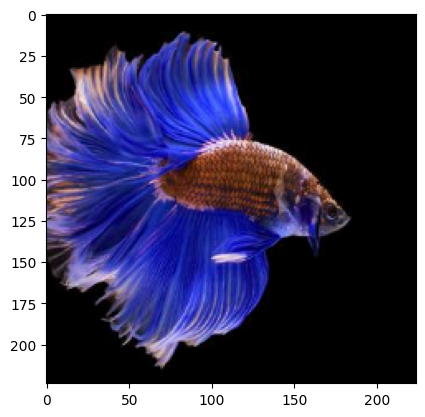

In [133]:
fish=cv2.imread("fish.jpeg")
fish=cv2.resize(fish,(224, 224))/255
plt.imshow(fish)

In [134]:
fish=fish.reshape((1,224,224,-1))
fish_labels[np.argmax(clf.predict(fish))]

1/1 [==============================] - 0s 88ms/step


'goldfish'

In [121]:
#flower classification with pre-trained model for fishes

In [119]:
X=[]
Y=[]
for flower_name,images in flowers_dic.items():
    for image in images:
        img=cv2.imread(image)
        X.append(cv2.resize(img,(224,224)))
        Y.append(flower_classes[flower_name])            

In [120]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y, test_size=0.25,random_state=100)

In [122]:
xtrain=np.array(xtrain)/255
xtest=np.array(xtest)/255
ytrain=np.array(ytrain)
ytest=np.array(ytest)

In [147]:
ypred=clf.predict(xtest)
ypred_class=[np.argmax(i) for i in ypred]

29/29 [==============================] - 15s 511ms/step


In [145]:
fish_labels[ypred_class[0]]

'lycaenid'

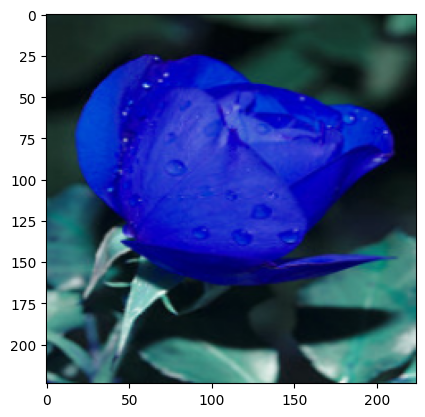

In [146]:
plt.imshow(xtest[0])

In [148]:
model = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",input_shape=(224, 224,3), trainable=False),
    keras.layers.Dense(5,activation='softmax')
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_4 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [149]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

model.fit(xtrain, ytrain, epochs=5)

Epoch 1/5
86/86 [==============================] - 49s 531ms/step - loss: 0.7877 - accuracy: 0.7089
Epoch 2/5
86/86 [==============================] - 49s 571ms/step - loss: 0.4031 - accuracy: 0.8572
Epoch 3/5
86/86 [==============================] - 44s 512ms/step - loss: 0.3181 - accuracy: 0.8917
Epoch 4/5
86/86 [==============================] - 47s 544ms/step - loss: 0.2684 - accuracy: 0.9128
Epoch 5/5
86/86 [==============================] - 46s 531ms/step - loss: 0.2267 - accuracy: 0.9357


In [150]:
model.evaluate(xtest,ytest)

29/29 [==============================] - 16s 533ms/step - loss: 0.3913 - accuracy: 0.8606


[0.39134982228279114, 0.8605664372444153]

In [151]:
ypred_flower=model.predict(xtest)
ypred_class_flower=[np.argmax(i) for i in ypred_flower]

29/29 [==============================] - 15s 504ms/step


In [172]:
ypred_class_flower[1]

3

In [169]:
flower_classes.items()

dict_items([('roses', 0), ('daisy', 1), ('dandelion', 2), ('sunflowers', 3), ('tulips', 4)])

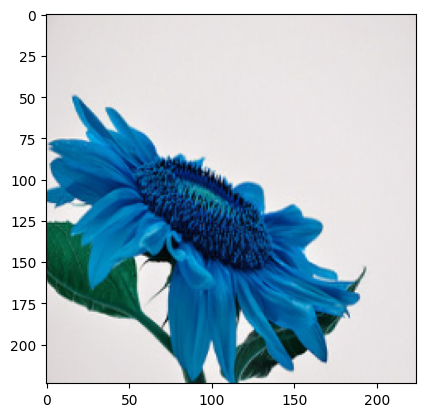

In [173]:
plt.imshow(xtest[1])